## PREDIKSI HARGA RUMAH BERDASARKAN LUAS AREA

# NAMA : REZA ALFIANSYAH
# NPM : 51421294

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv("Housing_Data.csv")

In [56]:
#menampilkan dimensi data
df.shape

(545, 13)

In [57]:
#menampilkan data teratas
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [58]:
#statistik dasar
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [59]:
#menampilkan tipe data
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [60]:
q1 = df.select_dtypes(exclude=['object']).quantile (0.25)
q3 = df.select_dtypes(exclude=['object']).quantile (0.75)
iqr = q3-q1
iqr

price        2310000.0
area            2760.0
bedrooms           1.0
bathrooms          1.0
stories            1.0
parking            1.0
dtype: float64

In [61]:
outlier_filter = (df.select_dtypes(exclude=['object']) < q1 - 1.5 * iqr) | (df.select_dtypes(exclude=['object']) > q3 + 1.5 * iqr)
outlier_filter

,price,area,bedrooms,bathrooms,stories,parking
0,True,False,False,False,False,False
1,True,False,False,True,True,True
2,True,False,False,False,False,False
3,True,False,False,False,False,True
4,True,False,False,False,False,False
...,...,...,...,...,...,...
540,False,False,False,False,False,False
541,False,False,False,False,False,False
542,False,False,False,False,False,False
543,False,False,False,False,False,False


In [62]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Menghitung Jumlah Outlier Pada Data
for col in outlier_filter.columns :
    if df[col].dtype != object :
        print('Nama Kolom:',col)
        print(outlier_filter[col].value_counts())
        print('-------------------')
        

Nama Kolom: price
price
False    530
True      15
Name: count, dtype: int64
-------------------
Nama Kolom: area
area
False    533
True      12
Name: count, dtype: int64
-------------------
Nama Kolom: bedrooms
bedrooms
False    533
True      12
Name: count, dtype: int64
-------------------
Nama Kolom: bathrooms
bathrooms
False    544
True       1
Name: count, dtype: int64
-------------------
Nama Kolom: stories
stories
False    504
True      41
Name: count, dtype: int64
-------------------
Nama Kolom: parking
parking
False    533
True      12
Name: count, dtype: int64
-------------------


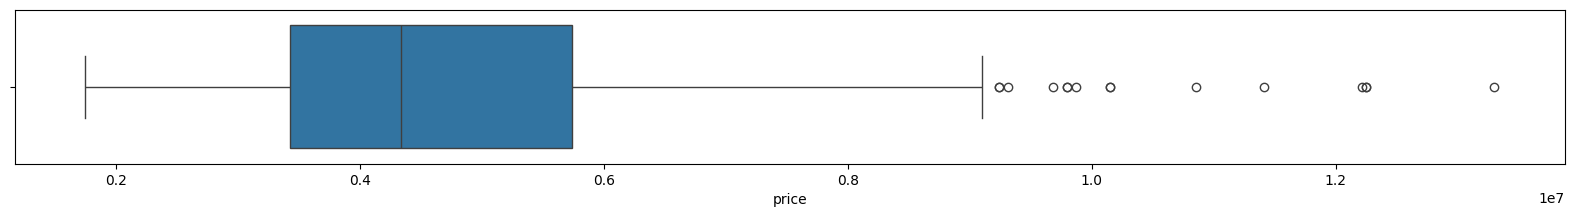

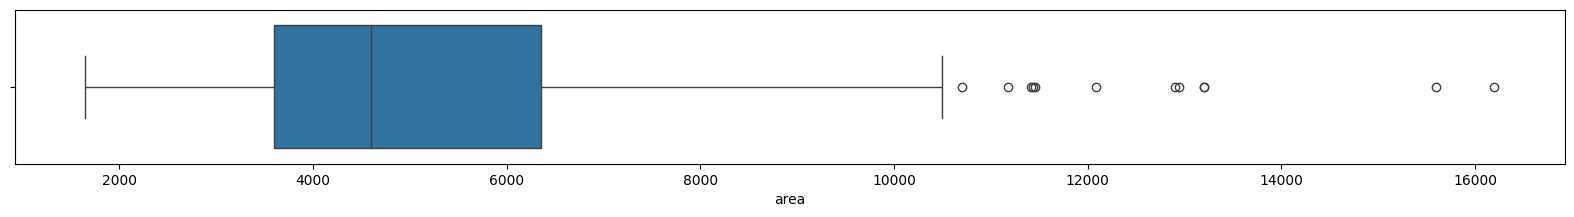

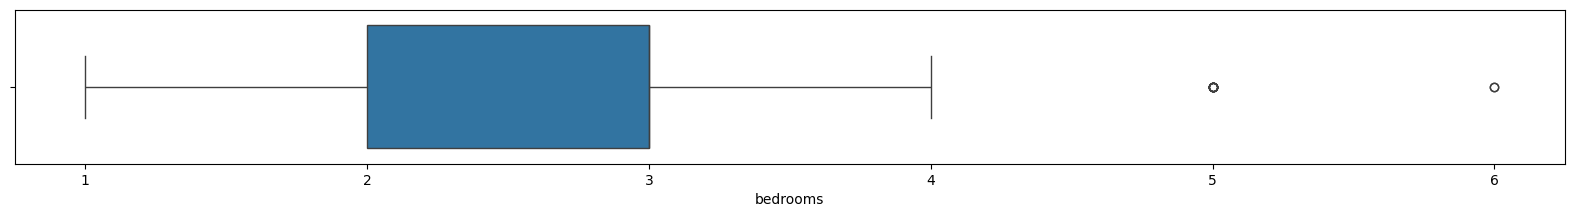

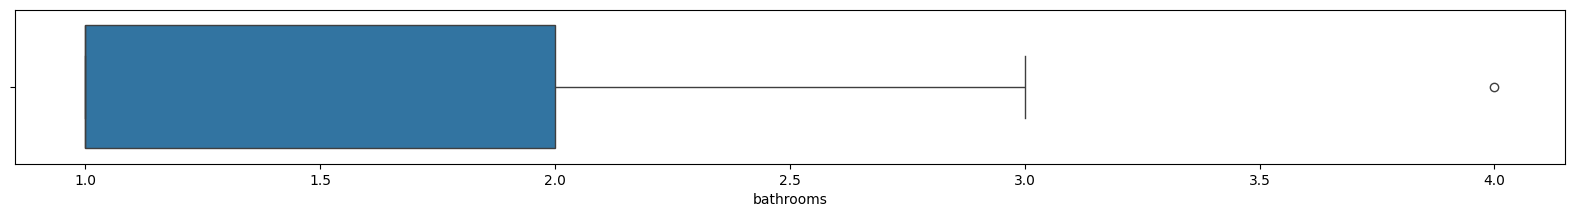

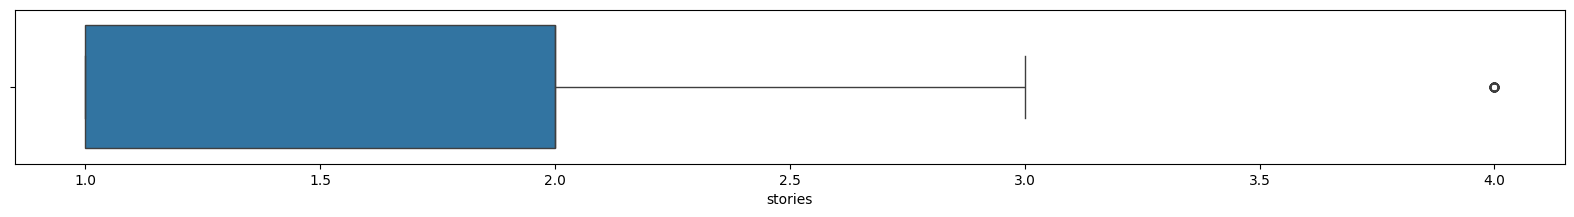

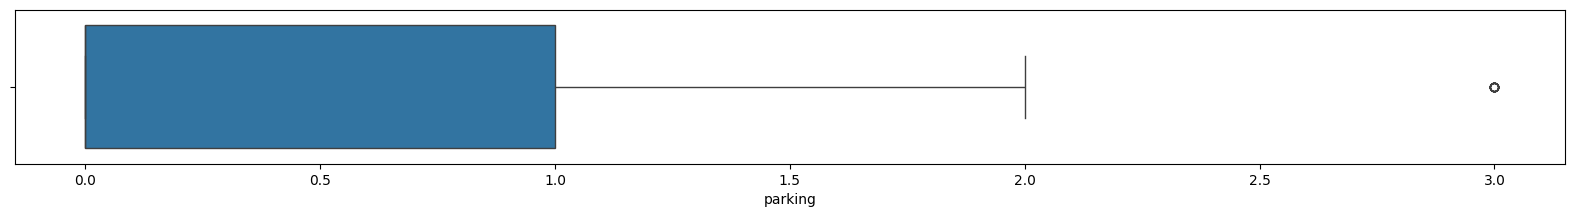

In [64]:
# Mencari Outliers - Boxplot
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

In [65]:
# Persentase Outliers
length_outliers_percentage = (
    len(outlier_filter[outlier_filter.stories == True]) / len(df["stories"]) * 100
)
length_outliers_percentage

7.522935779816514

In [66]:
# missing value
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

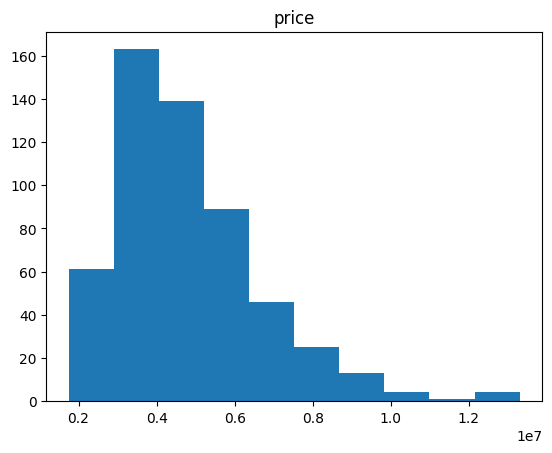

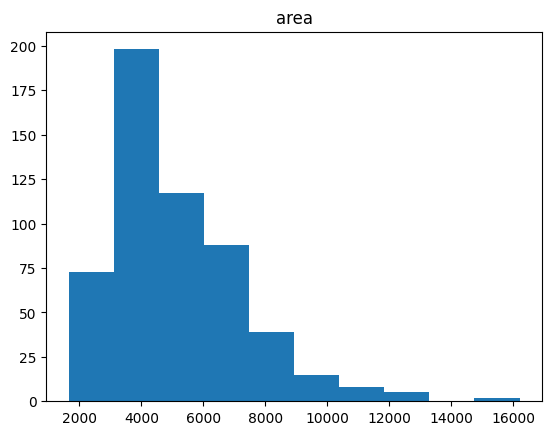

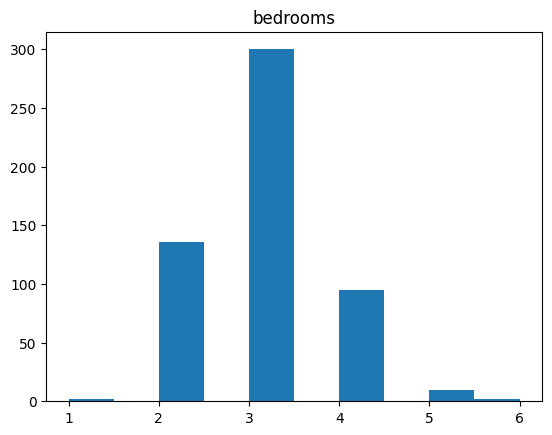

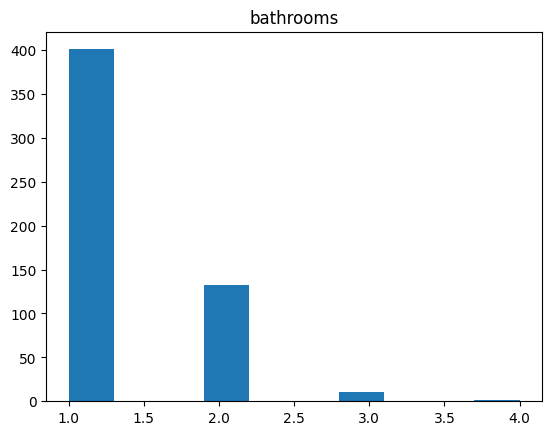

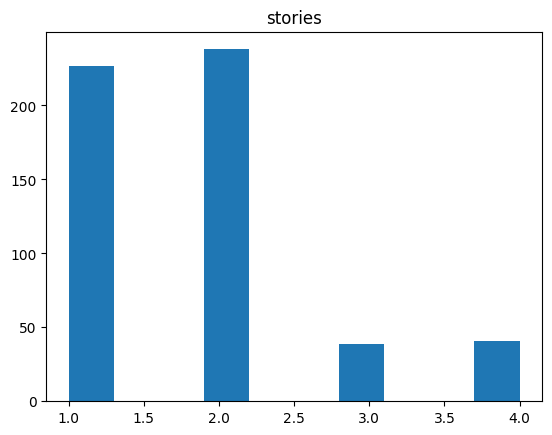

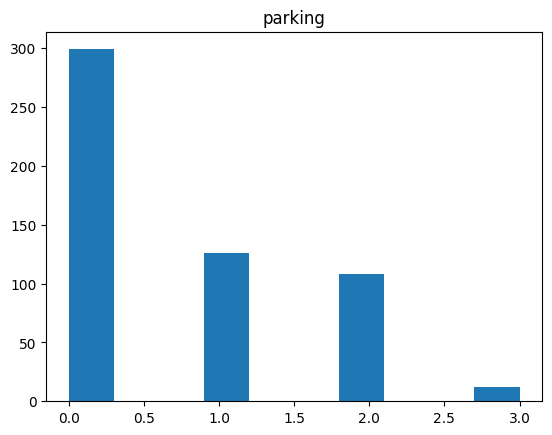

In [67]:
# Visual Histogram
df_outlier = df.select_dtypes(exclude=["object"])
for column in df_outlier:
    plt.hist(df[column])
    plt.title(column)
    plt.show()

In [68]:
# menyiapkan list distribusi luas area rumah
areaorder = df["area"]
areaorder

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64

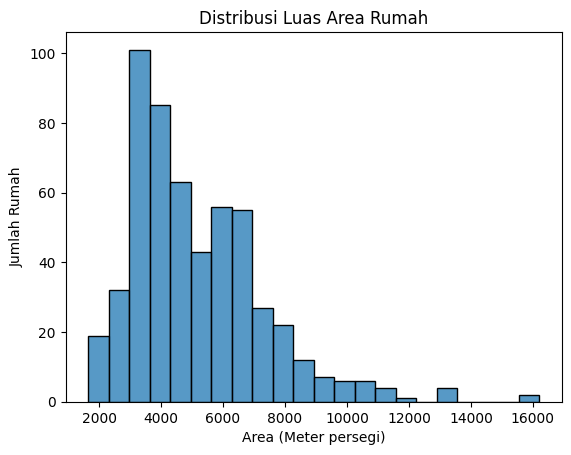

In [69]:
# visualisasi Histogram distribusi luas area rumah
sns.histplot(df["area"]).set(title="Distribusi Luas Area Rumah")
plt.xlabel("Area (Meter persegi)")
plt.ylabel("Jumlah Rumah")
plt.show()

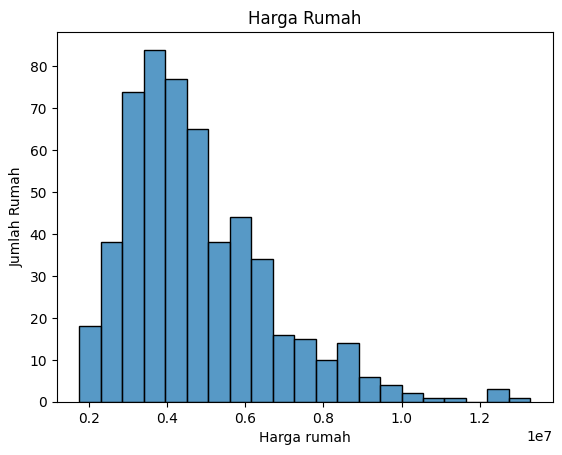

In [70]:
sns.histplot(df["price"]).set(title="Harga Rumah")

plt.xlabel("Harga rumah")
plt.ylabel("Jumlah Rumah")
plt.show()

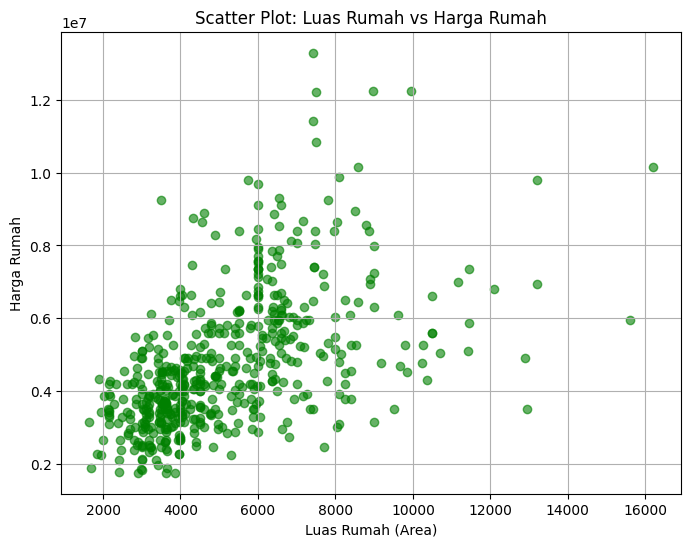

In [71]:
# Visualisasi Scatter plot antara luas rumah dan harga rumah
plt.figure(figsize=(8, 6))
plt.scatter(df["area"], df["price"], color="green", alpha=0.6)
plt.title("Scatter Plot: Luas Rumah vs Harga Rumah")
plt.xlabel("Luas Rumah (Area)")
plt.ylabel("Harga Rumah")
plt.grid(True)
plt.show()

<Axes: >

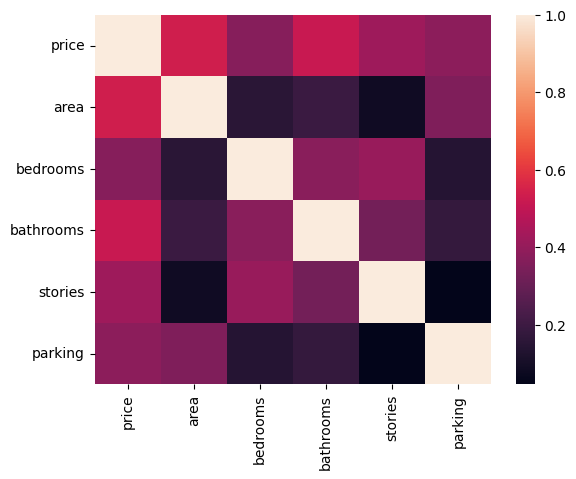

In [72]:
# Melihat korelasi dengan heatmap
sns.heatmap(df.select_dtypes(exclude=["object"]).corr())

## Model Linear Regression

In [73]:
# memuat data
df = pd.read_csv("Housing_Data.csv")

In [74]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [75]:
df = df.drop('stories', axis=1)

In [76]:
df.head()

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,yes,yes,yes,no,yes,2,no,furnished


In [77]:
# Scaling
from sklearn.preprocessing import RobustScaler

In [78]:
scaler = RobustScaler()
df[['price','area']] = scaler.fit_transform(df[['price','area']])
df.head()

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3.878788,1.021739,4,2,yes,no,no,no,yes,2,yes,furnished
1,3.424242,1.579710,4,4,yes,no,no,no,yes,3,no,furnished
2,3.424242,1.942029,3,2,yes,no,yes,no,no,2,yes,semi-furnished
3,3.409091,1.050725,4,2,yes,no,yes,no,yes,3,yes,furnished
4,3.060606,1.021739,4,1,yes,yes,yes,no,yes,2,no,furnished


In [79]:
# membuat variable independen x dan variable dependen y
x = df[['price']]
y = df[['area']]

In [80]:
# Membagi dataset ke data latih dan data uji

# Import fungsi train_test_split untuk membagi data dari libray sklearn dan modul model_selection
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [81]:
# Memanggil fungsi LinearRegression
from sklearn.linear_model import LinearRegression

In [82]:
# Memanggil objek LinearRegression ke dalam variabel mlr
lr = LinearRegression()

# Melatih model
lr.fit(x_train, y_train)

LinearRegression()

In [83]:
# Memprediksi model
y_pred_lr = lr.predict(x_test)
# Nilai prediksi
print("Prediction for test set: {}".format(y_pred_lr))

Prediction for test set: [[ 0.13289964]
 [ 0.42455593]
 [ 0.02046205]
 [ 0.5894644 ]
 [-0.18737713]
 [ 0.44636201]
 [-0.07153234]
 [-0.18737713]
 [-0.07834674]
 [ 0.79389638]
 [ 0.5553924 ]
 [ 0.01705485]
 [-0.14649073]
 [-0.11923313]
 [ 0.04431245]
 [-0.24189232]
 [ 0.09882765]
 [-0.03746034]
 [-0.10560434]
 [ 0.07157005]
 [ 0.21467243]
 [ 0.28826795]
 [ 0.49406281]
 [-0.39180911]
 [ 0.43273321]
 [ 0.30325963]
 [ 0.37004074]
 [ 0.13971404]
 [ 0.31688842]
 [ 0.39866122]
 [ 0.07838445]
 [-0.05108914]
 [ 0.26237323]
 [-0.11241873]
 [-0.03882322]
 [ 0.16560876]
 [ 1.01195716]
 [-0.07834674]
 [-0.14649073]
 [ 0.07157005]
 [ 0.98469956]
 [ 0.03068365]
 [ 0.35777482]
 [-0.15057937]
 [-0.05245202]
 [ 0.71212359]
 [ 0.13971404]
 [-0.11923313]
 [ 0.05112685]
 [ 0.5349492 ]
 [ 0.05112685]
 [ 0.15334284]
 [-0.14649073]
 [-0.01020274]
 [-0.11923313]
 [ 0.22830123]
 [ 0.50769161]
 [ 0.35777482]
 [-0.02383154]
 [ 0.17378604]
 [ 0.19422924]
 [ 0.30325963]
 [-0.07834674]
 [ 0.70530919]
 [-0.20782033]


In [90]:
import pandas as pd

# Jika y_test atau y_pred_lr adalah DataFrame, konversi ke numpy array
y_test = y_test.values if isinstance(y_test, pd.DataFrame) else y_test
y_pred_lr = y_pred_lr.values if isinstance(y_pred_lr, pd.DataFrame) else y_pred_lr

# Buat DataFrame dengan benar
lr_diff = pd.DataFrame({
    'Actual value': y_test.flatten(),  # Pastikan ini adalah numpy array
    'Predicted value': y_pred_lr.flatten()  # Pastikan ini adalah numpy array
})

# Tampilkan beberapa baris pertama dari DataFrame
print(lr_diff.head())



   Actual value  Predicted value
0     -0.217391         0.132900
1      1.818841         0.424556
2     -0.413043         0.020462
3      3.115942         0.589464
4     -0.340580        -0.187377


In [85]:
# Menerapkan threshold pada variabel y_pred_lr ke dalam variabel y_predict_class
y_predict_class = [1 if prob > 0.5 else 0 for prob in y_pred_lr]

In [86]:
# Import Library
from sklearn.metrics import accuracy_score

# Menghitung Akurasi
print("Accuracy:"
      , round(accuracy_score(y_test, y_predict_class), 3)) # Membulatkan nilai akurasi menjadi tiga angka di belakang koma

ValueError: Classification metrics can't handle a mix of continuous and binary targets

Bisa dilihat bahwa klasifikasi tidak cocok untuk dataset ini, dimana model klasifikasi tidak bisa dilakukan pada data campuran antara biner dan kontinu.
berarti menggunakan linear regresi

In [93]:
from sklearn.metrics import mean_squared_error, r2_score

# Menghitung MSE dan R^2
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print("Mean Squared Error:", round(mse, 3))
print("R^2 Score:", round(r2, 3))


Mean Squared Error: 0.596
R^2 Score: 0.303
